In [13]:
# Importing Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

In [14]:
# Loading dataset
df = pd.read_csv("API_19_DS2_en_csv_v2_4773766.csv", skiprows=4).iloc[:, :-1]
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27728.000,28330.000000,28764.000000,29157.000000,29505.000000,29802.000000,...,43864.000000,44228.000000,44588.000000,44943.000000,45297.000000,45648.000000,45999.000000,46351.000000,46574.000000,46734.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.147858,1.520329,1.357042,1.186472,1.001576,...,0.849393,0.826413,0.810669,0.793026,0.784578,0.771899,0.765986,0.762321,0.479958,0.342951
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.000,55811.000000,56682.000000,57475.000000,58178.000000,58782.000000,...,102112.000000,102880.000000,103594.000000,104257.000000,104874.000000,105439.000000,105962.000000,106442.000000,106585.000000,106537.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.179059,1.548572,1.389337,1.215721,1.032841,...,0.810231,0.749301,0.691615,0.637959,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045


In [15]:
# FIlling missing values
df.fillna(0, inplace=True)

In [16]:
# Dropping all world records
index = df[df["Country Name"] == "World"].index
df.drop(index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [17]:
# Extracting data of interested fields
cols = ['Population, total', "CO2 emissions (kt)"]
df_new = df[df["Indicator Name"].isin(cols)]

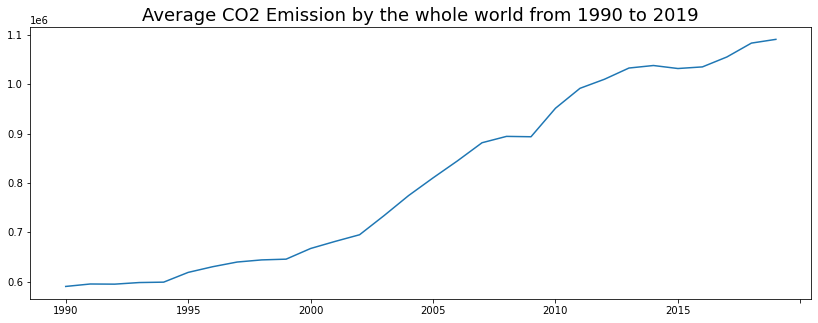

In [18]:
df_co2 = df_new[df_new["Indicator Name"] == "CO2 emissions (kt)"].drop(["Country Code", "Indicator Name", "Indicator Code"], axis=1).set_index("Country Name").iloc[:, :-2]
df_co2.iloc[:, 30:].mean().plot(kind="line", figsize=(14, 5))
plt.title("Average CO2 Emission by the whole world from 1990 to 2019", fontsize=18)
plt.show()

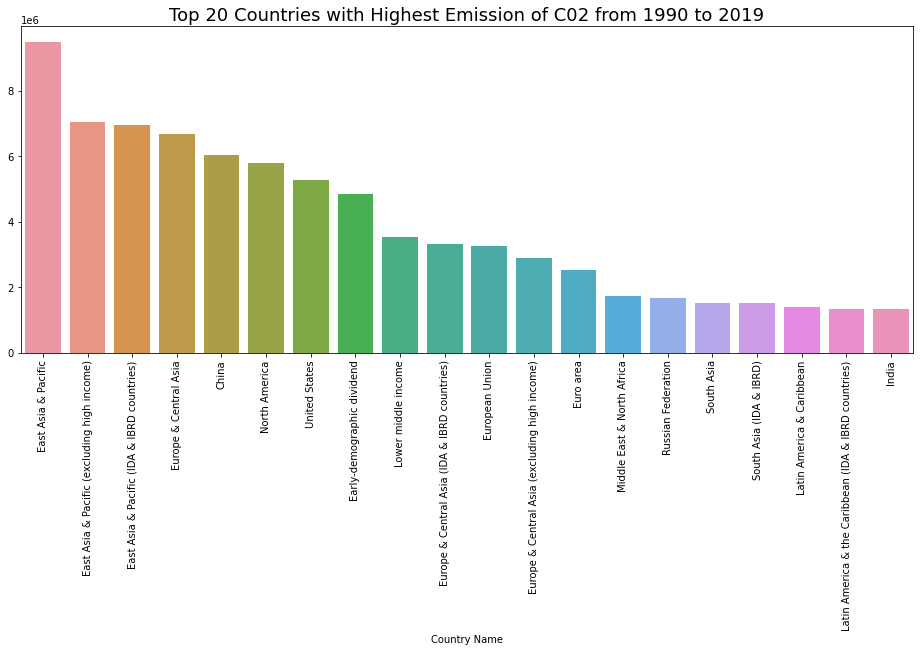

In [19]:
temp = df_co2.iloc[:, 30:].mean(axis=1).sort_values(ascending=False)
temp = temp[temp > 0][9:29]
plt.figure(figsize=(16, 6))
sns.barplot(temp.index, temp.values)
plt.title("Top 20 Countries with Highest Emission of C02 from 1990 to 2019", fontsize=18)
plt.xticks(rotation=90)
plt.show()

In [20]:
# Selecting top interesting countries
top_countries = ["China", "North America", "United States","European Union", "India", "Pakistan"]

# Pakitan CO2 Analysis

In [21]:
# Selecting data for only PK
df_pak = df_new[df_new["Country Name"] == "Pakistan"]

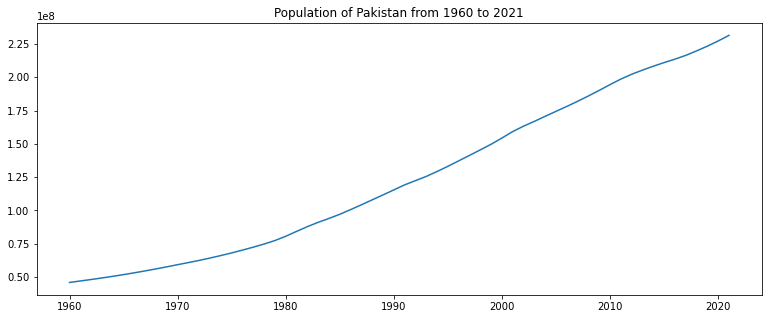

In [22]:
# Population of Pakistan from 1960 to 2021
df_pak.iloc[0, 4:].plot(kind="line", figsize=(13, 5))
plt.title("Population of Pakistan from 1960 to 2021")
plt.show()

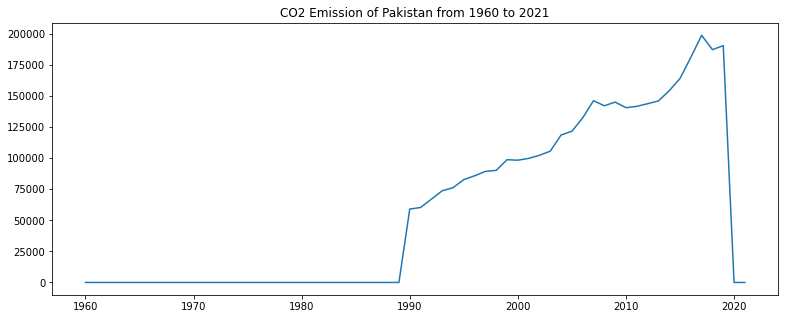

In [23]:
# CO2 Emission of Pakistan from 1960 to 2021
df_pak.iloc[1, 4:].plot(kind="line", figsize=(13, 5))
plt.title("CO2 Emission of Pakistan from 1960 to 2021")
plt.show()

In [31]:
temp = df_pak.iloc[1, -32:].sum()/df_co2.sum(axis=1).sum()

print(f"Contribution of Pakistan in CO2 emission is {round(temp, 5)} percent.")

Contribution of Pakistan in CO2 emission is 0.00056 percent.


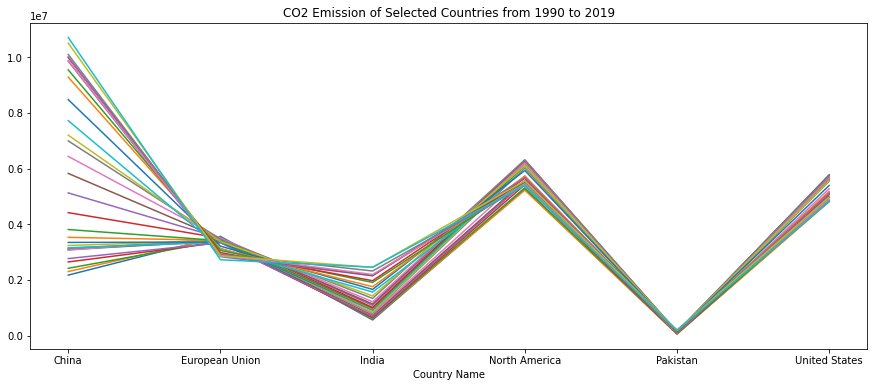

In [12]:
# Change in CO2 Emission of Selected Countries from 1990 to 2019
df_temp = df_new[df_new["Country Name"].isin(top_countries)]
df_temp = df_temp[df_temp["Indicator Name"] == "CO2 emissions (kt)"]
df_temp.set_index("Country Name").iloc[:, 33:-2].plot(kind="line", figsize=(15, 6), legend=False)
plt.title("CO2 Emission of Selected Countries from 1990 to 2019")
plt.show()

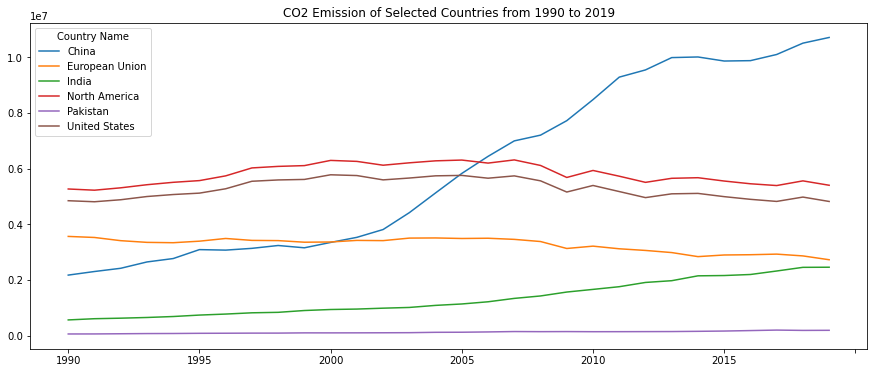

In [13]:
# CO2 Emission of Selected Countries from 1990 to 2019
df_temp.set_index("Country Name").iloc[:, 33:-2].T.plot(kind="line", figsize=(15, 6), legend=True)
plt.title("CO2 Emission of Selected Countries from 1990 to 2019")
plt.show()

# Clustering

In [14]:
# Preparing data for Clustering
df_new = df_new[df_new["Indicator Name"] == "CO2 emissions (kt)"]

count_mapper = dict([tuple([i, j]) for i, j in zip(df_new["Country Name"].unique(), range(df_new["Country Name"].nunique()))])
df_new["Country Name"] = df_new["Country Name"].map(count_mapper)
df_new.drop(df_new.select_dtypes("O").columns, axis=1, inplace=True)

In [15]:
# Transforming data to 2D for plotting
X = df_new.copy()
from sklearn.decomposition import PCA
X_new = PCA(2).fit_transform(X)

df_new[["X1", "X2"]] = X_new

In [16]:
# Clustering data
from sklearn.cluster import KMeans
kmean = KMeans(3)
kmean.fit(X)
y_pred = kmean.predict(X)

df_new["cluster"] = y_pred
df_new["Country Name"] = df_new["Country Name"].map({v: k for k, v in count_mapper.items()})
df_new["AVG_CO2"] = df_new.iloc[:, 1:-1].mean(axis=1)

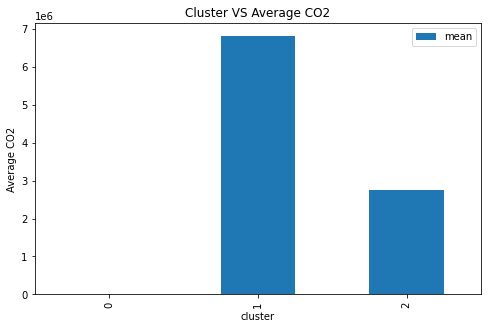

In [17]:
# PLoting clusters vs Average CO2
df_new.groupby("cluster").aggregate(["mean"])["AVG_CO2"].plot(kind="bar", figsize=(8, 5))
plt.title("Cluster VS Average CO2")
plt.ylabel("Average CO2")
plt.show()

In [18]:
# Finding cluster in which pakistan lies
pk_cluster = df_new[df_new["Country Name"] == "Pakistan"].cluster
print(f"Cluster of Pakistan Country is {pk_cluster.values[0]}")

Cluster of Pakistan Country is 0


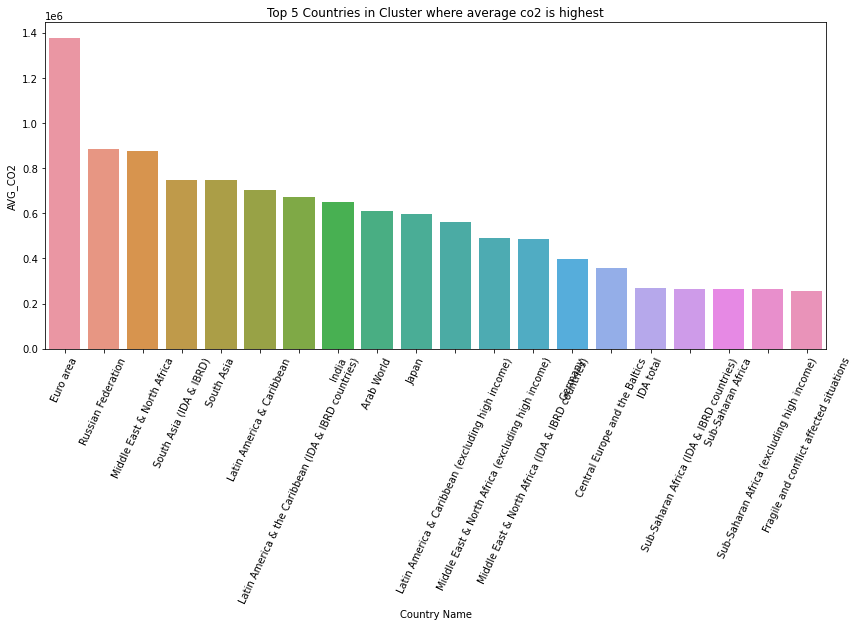

In [19]:
# Top 5 Countries in Cluster where average co2 is highest
temp = df_new[df_new.cluster == 0][["Country Name", "AVG_CO2"]].sort_values("AVG_CO2", ascending=False).iloc[:20, :]
plt.figure(figsize=(14, 6))
sns.barplot(temp["Country Name"], temp.AVG_CO2)
plt.title("Top 5 Countries in Cluster where average co2 is highest")
plt.xticks(rotation=65)
plt.show()

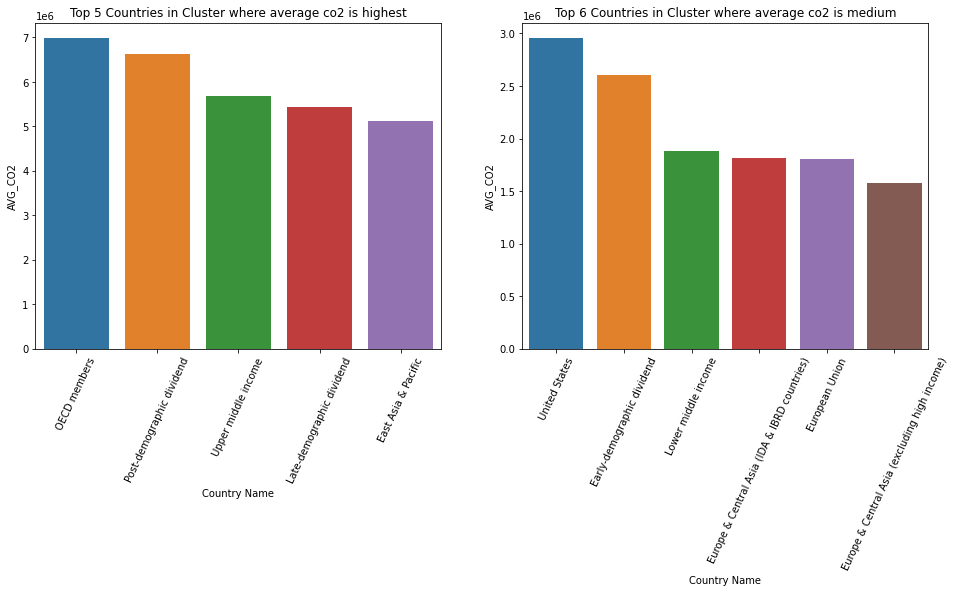

In [20]:
# Top 5 Countries in Cluster where average co2 is highest
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
temp = df_new[df_new.cluster == 1][["Country Name", "AVG_CO2"]].sort_values("AVG_CO2", ascending=False).iloc[5:, :]
sns.barplot(temp["Country Name"], temp.AVG_CO2)
plt.title("Top 5 Countries in Cluster where average co2 is highest")
plt.xticks(rotation=65)


# Top 5 Countries in Cluster where average co2 is medium
plt.subplot(1,2,2)
temp = df_new[df_new.cluster == 2][["Country Name", "AVG_CO2"]].sort_values("AVG_CO2", ascending=False).iloc[5:, :]
sns.barplot(temp["Country Name"], temp.AVG_CO2)
plt.title("Top 6 Countries in Cluster where average co2 is medium")
plt.xticks(rotation=65)
plt.show()

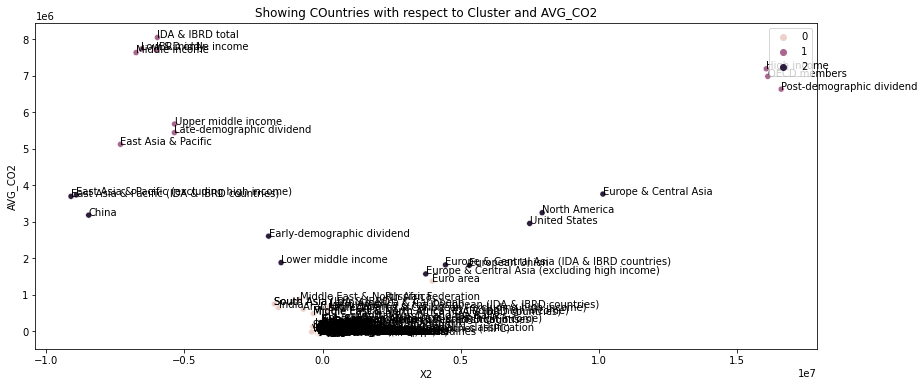

In [21]:
# Showing COuntries with respect to Cluster and AVG_CO2
plt.figure(figsize=(14, 6))
dots = sns.scatterplot(df_new.X2, df_new.AVG_CO2, hue=y_pred)
# Add text labels to each dot
for i, dot in zip(df_new["Country Name"].to_list(), dots.collections[0].get_offsets()):
    plt.annotate(f"{i}", (dot.data[0] + 0.05, dot.data[1] + 0.05))
plt.title("Showing COuntries with respect to Cluster and AVG_CO2")
plt.show()